In [1]:
# %matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.integrate import odeint

In [2]:
t_step = 0.01
t_max = 500
t = np.arange(0, t_max, t_step)

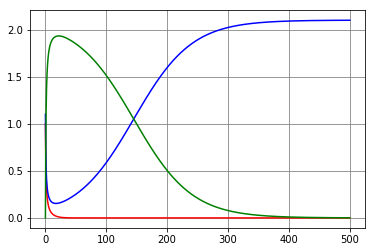

In [3]:
# Practice: steady state (winner-take-all)
# A+B -> k1 -> 2C
# A+C -> k2 -> 2A
# B+C -> k2 -> 2B

k1 = 1.0
k2 = 0.01

init_a = 1.0
init_b = 1.1
init_c = 0.0 # start with 0.0
init_state = [init_a, init_b, init_c]

def model1(state, t):
    dadt = state[0] * (k2 * state[2] - k1 * state[1])
    dbdt = state[1] * (k2 * state[2] - k1 * state[0])
    dcdt = 2 * k1 * state[0] * state[1] - k2 * state[2] * (state[0] + state[1])
    return [dadt, dbdt, dcdt]

result1 = odeint(model1, init_state, t)
plt.plot(t, result1[:,0], label='a', color='red')
plt.plot(t, result1[:,1], label='b', color='blue')
plt.plot(t, result1[:,2], label='c', color='green')
plt.grid(which='major',color='gray',linestyle='-')

In [4]:
t_step = 1
t_max = 200
t = np.arange(0, t_max, t_step)

In [69]:
# HW: Reaction Defusion
# A -> k1 -> 2A
# A -> k2 -> φ

x_step = 1
x_max = 15
x = np.arange(0, x_max, x_step)

k1 = 0.5
k2 = 0.5
d = 0.1

init = 10
a_init = np.zeros(x_max)
a_init[int(x_max / 2)] = init

def dadt(state, x):
    if x == 0:
        return (k1 - k2) * state[x] + d * (state[x + 1] - state[x])
    if x == x_max - 1:
        return (k1 - k2) * state[x] + d * (state[x - 1] - state[x])
    return (k1 - k2) * state[x] + d * (state[x - 1] + state[x + 1] - 2 * state[x])

def model2(state, t):
    ret = np.zeros(x_max)
    for pos in x:
        ret[pos] = dadt(state, pos)
    return ret

result2 = odeint(model2, a_init, t)

In [70]:
# Show result graph animation
# fig = plt.figure()
# ims = []

# for i in range(len(t)):
    # im = plt.plot(x, result2[(i+5)*40][1:-1], color='blue')
    # ims.append(im)
    
# ani = animation.ArtistAnimation(fig, ims, interval=1000)
# plt.show()

(0, 11)

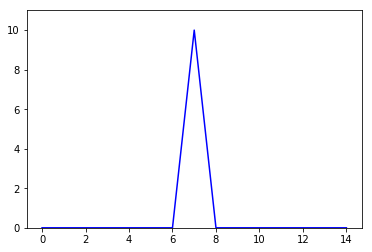

In [71]:
plt.plot(x, result2[0], color='blue')
plt.ylim(0,init + 1)

(0, 11)

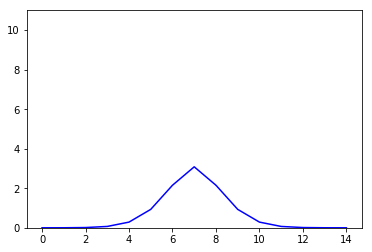

In [72]:
plt.plot(x, result2[10], color='blue')
plt.ylim(0,init + 1)

(0, 11)

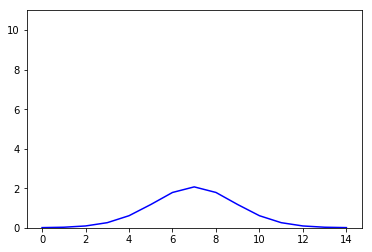

In [73]:
plt.plot(x, result2[20], color='blue')
plt.ylim(0,init + 1)

(0, 11)

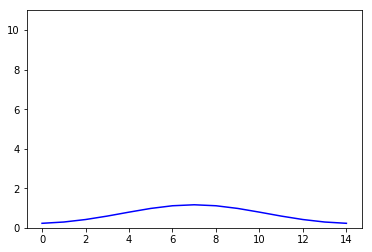

In [74]:
plt.plot(x, result2[60], color='blue')
plt.ylim(0,init + 1)

(0, 11)

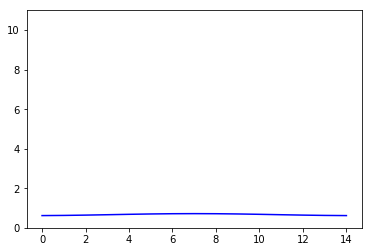

In [75]:
plt.plot(x, result2[190], color='blue')
plt.ylim(0,init + 1)